# Introduction

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import graphviz

# install graphviz on Windows using `winget install graphviz`
# install graphviz on Ubuntu using `sudo apt install graphviz`
# install graphviz on Mac using `brew install graphviz`
# make sure the to set up your PATH to point at the newly installed binaries

# Decision Tree Classifier

In [2]:
x = [[np.random.randn(), np.random.randn()] for i in range(1, 300)]
y = [[(a > 0) & (b > 0) | (a < 0) & (b < 0)] for (a, b) in x]

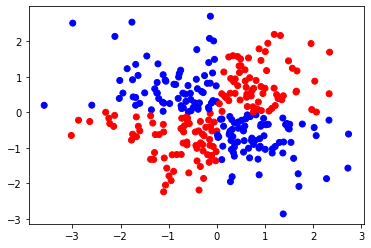

In [3]:
# clear old visualizations
plt.close('all')

# visualize the points
fig, ax = plt.subplots()
plt.scatter(list(zip(*x))[0], list(zip(*x))[1], c=y, cmap='bwr')

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix

mc = DecisionTreeClassifier(max_depth=1, min_samples_leaf=5) 
mc.fit(x, y)

accuracy_score(y, mc.predict(x))

0.5518394648829431

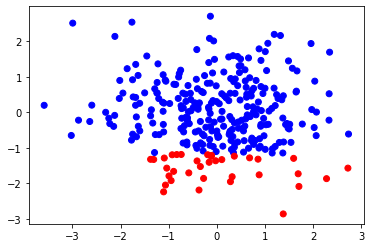

In [5]:
# clear old visualizations
plt.close('all')

# visualize the points
fig, ax = plt.subplots()
plt.scatter(list(zip(*x))[0], list(zip(*x))[1], c=mc.predict(x), cmap='bwr')

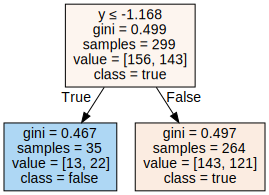

In [6]:
features = ["x", "y"]
target = ["true", "false"]

dat = export_graphviz(mc, filled=True, special_characters=True, feature_names=features, class_names=target)

graph = graphviz.Source(dat)
graph

In [7]:
m2c = DecisionTreeClassifier(max_depth=2, min_samples_leaf=5) 
m2c.fit(x, y)

ŷ = m2c.predict(x)

accuracy_score(y, ŷ)

0.6220735785953178

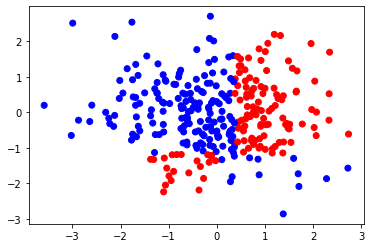

In [8]:
plt.close('all')

# visualize the points
fig, ax = plt.subplots()
plt.scatter(list(zip(*x))[0], list(zip(*x))[1], c=ŷ, cmap='bwr')

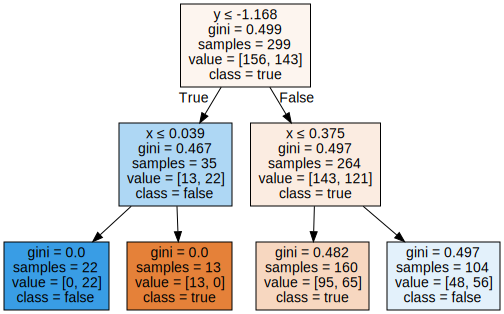

In [9]:
features = ["x", "y"]
target = ["true", "false"]

dat = export_graphviz(m2c, filled=True, special_characters=True, feature_names=features, class_names=target)

graph = graphviz.Source(dat)
graph

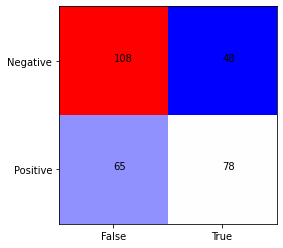

In [10]:
# we can visualize the accuracy of the model using a confusion matrix

acc = confusion_matrix(y, ŷ)

plt.close('all')

fig, ax = plt.subplots()
ax.imshow(acc, cmap='bwr')
ax.xaxis.set(ticks=(0, 1), ticklabels=('False', 'True'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Negative', 'Positive'))
for i in range(2):
    for j in range(2):
        ax.text(j, i, acc[i][j], color='black')
plt.show()

# Decision Tree Regressor

In [11]:
x = np.linspace(0, 4 * 3.14159, 1000)
y = np.sin(x) + np.random.randn(1000)/5

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

Text(0, 0.5, 'target')

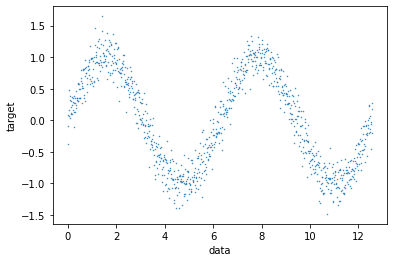

In [12]:
# clear old visualizations
plt.close('all')

# visualize the points
fig, ax = plt.subplots()
plt.scatter(x, y, s=0.2)
ax.set_xlabel("data")
ax.set_ylabel("target")

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

m2 = DecisionTreeRegressor(max_depth=2, min_samples_leaf=5) 
m2.fit(x, y)
ŷ = m2.predict(x)

mean_squared_error(y, ŷ)

0.31367050534772395

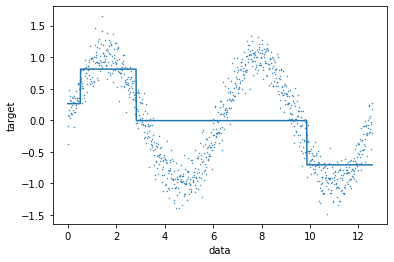

In [14]:
# clear old visualizations
plt.close('all')

# visualize the points
fig, ax = plt.subplots()
plt.scatter(x, y, s=0.2)
ax.set_xlabel("data")
ax.set_ylabel("target")
plt.plot(x, ŷ)

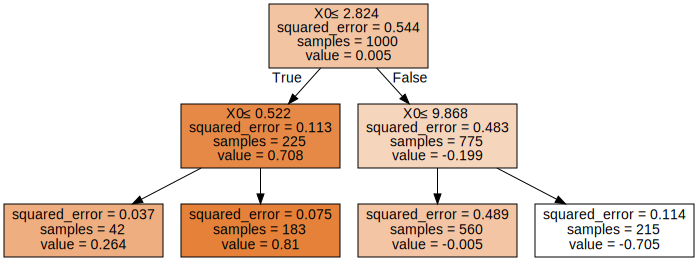

In [15]:
dat = export_graphviz(m2, filled=True, special_characters=True)
graph = graphviz.Source(dat)
graph

In [16]:
m5 = DecisionTreeRegressor(max_depth=5, min_samples_leaf=5) 
m5.fit(x, y)

mean_squared_error(y, m5.predict(x))

0.0457461295528712

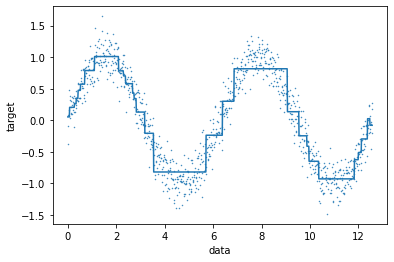

In [17]:
# clear old visualizations
plt.close('all')

# visualize the points
fig, ax = plt.subplots()
plt.scatter(x, y, s=0.2)
ax.set_xlabel("data")
ax.set_ylabel("target")
plt.plot(x, m5.predict(x))

# Working with real data

In [18]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [19]:
x, xt, y, yt = train_test_split(pd.DataFrame(housing.data), pd.DataFrame(housing.target), test_size = 0.2)
x

,0,1,2,3,4,5,6,7
18106,8.0837,25.0,7.587242,1.033771,1699.0,3.187617,37.30,-122.01
19802,0.5360,36.0,12.250000,3.500000,18.0,2.250000,40.31,-123.17
43,3.9643,52.0,4.797980,1.020202,467.0,2.358586,37.84,-122.26
13066,2.9693,13.0,4.452314,1.029273,2420.0,2.285175,38.54,-121.32
8872,5.5321,43.0,5.153767,1.090815,1830.0,1.888545,34.06,-118.41
...,...,...,...,...,...,...,...,...
5641,4.4671,47.0,5.382567,0.992736,1163.0,2.815981,33.74,-118.30
7328,2.2422,33.0,4.064081,1.080944,2106.0,3.551433,33.97,-118.17
19977,2.3937,20.0,18.793522,5.263158,658.0,2.663968,35.82,-118.70
6164,3.2969,37.0,5.030973,0.898230,672.0,2.973451,34.08,-117.95


In [20]:
y

,0
18106,3.80600
19802,0.14999
43,1.88800
13066,1.04400
8872,5.00001
...,...
5641,2.70800
7328,1.68200
19977,0.82100
6164,1.89000


In [21]:
m2r = DecisionTreeRegressor(max_depth=2, min_samples_leaf=5) 
m2r.fit(x, y)

mean_squared_error(y, m2r.predict(x))

0.7374654187495548

In [22]:
m5r = DecisionTreeRegressor(max_depth=5, min_samples_leaf=5) 
m5r.fit(x, y)

mean_squared_error(y, m5r.predict(x))

0.4873329221691318

In [23]:
m20r = DecisionTreeRegressor(max_depth=20, min_samples_leaf=5) 
m20r.fit(x, y)

mean_squared_error(y, m20r.predict(x))

0.1197310857881066

In [24]:
mr200 = DecisionTreeRegressor(max_depth=150, min_samples_leaf=5) 
mr200.fit(x, y)

mean_squared_error(y, mr200.predict(x))

0.11878166263641933

In [25]:
fi = m20r.tree_.compute_feature_importances(normalize=False)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

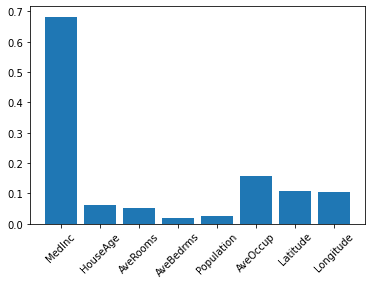

In [26]:
# clear old visualizations
plt.close('all')

# visualize the points
fig, ax = plt.subplots()
plt.bar(housing.feature_names, fi)
plt.xticks(rotation=45)

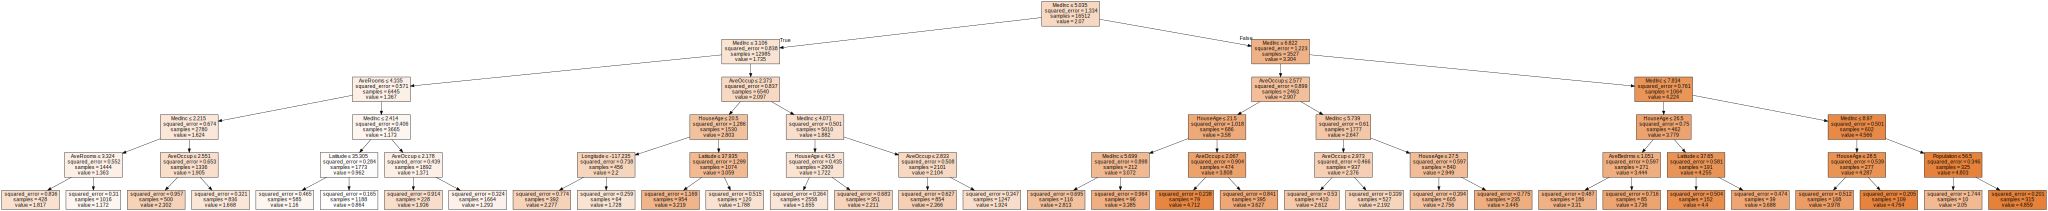

In [27]:
dat = export_graphviz(m5r, filled=True, 
                           special_characters=True,
                           feature_names=housing.feature_names)
graph = graphviz.Source(dat)
graph

# Limitations - Complexity

In [28]:
v = np.linspace(0, 4 * 3.14159, 1000)
xpos = np.sin(v) * v + np.random.randn(1000)
ypos = np.cos(v) * v + np.random.randn(1000)
x1 = [[x, y] for (x, y) in zip(xpos, ypos)]
xpos = -np.sin(v) * v + np.random.randn(1000)
ypos = -np.cos(v) * v + np.random.randn(1000)
x2 = [[x, y] for (x, y) in zip(xpos, ypos)]


x = np.array(x1+x2)
x

y = np.array([True for i in range(1000)] + [False for i in range(1000)])
y = y.reshape(-1, 1)

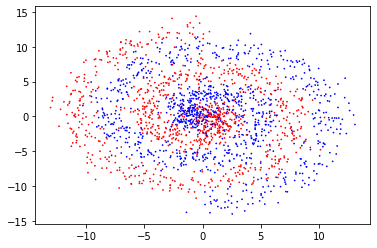

In [29]:
# clear old visualizations
plt.close('all')

# visualize the points
fig, ax = plt.subplots()
plt.scatter(list(zip(*x))[0], list(zip(*x))[1], c=y, cmap='bwr', s=0.5)

In [30]:
ms = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5) 
ms.fit(x, y)
ŷ = ms.predict(x)

accuracy_score(y, ŷ)

0.6135

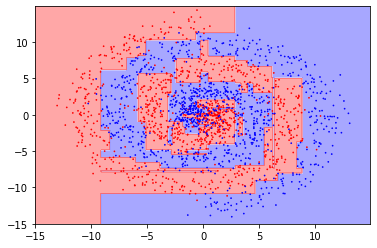

In [33]:
# clear old visualizations
plt.close('all')

# Plotting decision regions
xx, yy = np.meshgrid(np.arange(-15, 15, 0.1), np.arange(-15, 15, 0.1))
z = ms.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, alpha=0.4, cmap='bwr')
plt.scatter(list(zip(*x))[0], list(zip(*x))[1], c=y, cmap='bwr', s=0.5)

In [34]:
ms = DecisionTreeClassifier(max_depth=20, min_samples_leaf=5) 
ms.fit(x, y)
ŷ = ms.predict(x)

accuracy_score(y, ŷ)

0.902

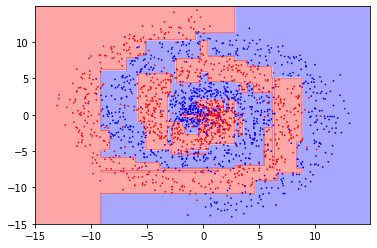

In [36]:
# clear old visualizations
plt.close('all')

# Plotting decision regions
xx, yy = np.meshgrid(np.arange(-15, 15, 0.1), np.arange(-15, 15, 0.1))
z = ms.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, alpha=0.4, cmap='bwr')
plt.scatter(list(zip(*x))[0], list(zip(*x))[1], c=y, cmap='bwr', s=0.5)

# Limitations - Training Samples

In [37]:
x = np.linspace(0, 4 * 3.14159, 1000)
y = np.sin(x) + np.random.randn(1000)/5

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

mts = DecisionTreeRegressor(max_depth=20, min_samples_leaf=5) 
mts.fit(x, y)

mean_squared_error(y, mts.predict(x))

0.02562984533781285

In [38]:
x = np.linspace(0, 8 * 3.14159, 1000)
y = np.sin(x) + np.random.randn(1000)/5

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

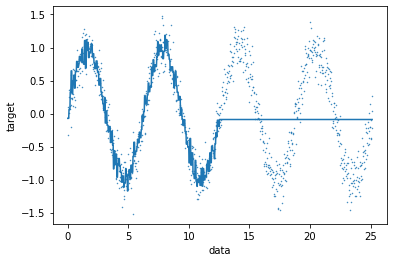

In [39]:
# clear old visualizations
plt.close('all')

# visualize the points
fig, ax = plt.subplots()
plt.scatter(x, y, s=0.2)
ax.set_xlabel("data")
ax.set_ylabel("target")
plt.plot(x, mts.predict(x))